In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from adjustText import adjust_text

# use TeX rendering and the Times font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

df = pd.read_csv('synthetic_data.csv')
df

,Model,Lang,Data,nDCG@20
0,Omikuji,de,orig,0.5122
1,Omikuji,de,+A8,0.5513
2,Omikuji,de,+Q4,0.5602
3,Omikuji,de,+G4,0.5612
4,Omikuji,de,+E9,0.5630
5,Omikuji,de,+orig2,0.5701
6,Omikuji,en,orig,0.5595
7,Omikuji,en,+Q4,0.5896
8,Omikuji,en,+A8,0.5929
9,Omikuji,en,+S8,0.5932


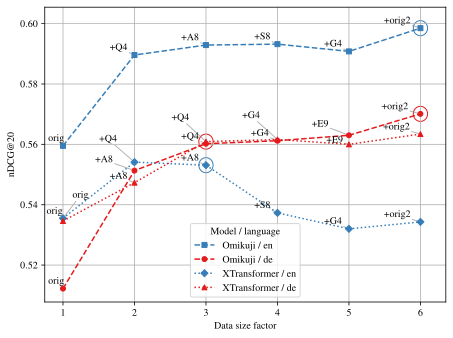

In [58]:
%config InlineBackend.figure_format = 'svg'

# Define colors and markers for each model/language combination
colormap = plt.get_cmap('Set1')
colors =  {"Omikuji / de": colormap(0), "Omikuji / en": colormap(1),
           "XTransformer / de": colormap(0), "XTransformer / en": colormap(1)}
markers = {"Omikuji / de": "o", "Omikuji / en": "s",
           "XTransformer / de": "^", "XTransformer / en": "D"}
lines =   {"Omikuji / de": "dashed", "Omikuji / en": "dashed",
           "XTransformer / de": "dotted", "XTransformer / en": "dotted"}

# Configurations selected for training
selected = [('Omikuji', 'de', 5),
            ('Omikuji', 'en', 5),
            ('XTransformer', 'de', 2),
            ('XTransformer', 'en', 2)
           ]


# Create the plot
fig, ax = plt.subplots()
texts = []  # Store text objects for adjustment
original_positions = []  # Store original positions for arrows


# Plot the data points themselves, separately for de/en language, in different styles
for model in ('Omikuji', 'XTransformer'):
    for lang in ('en', 'de'):
        key = f"{model} / {lang}"
        subset = df[(df["Model"] == model) & (df["Lang"] == lang)]
        ax.plot(range(1, len(subset) + 1), subset["nDCG@20"], 
                c=colors[key], marker=markers[key], ls=lines[key], label=key, ms=5)

        # Add labels next to each point
        for idx, (_, row) in enumerate(subset.iterrows()):
            x, y = idx + 1, row["nDCG@20"]
            text = ax.text(x-0.2, y+0.005, row["Data"], fontsize=10, ha='center', va='top')
            texts.append(text)
            original_positions.append((x, y))

            # If this is one of the selected configurations, draw a circle around it
            if (model, lang, idx) in selected:
                ax.add_patch(patches.Ellipse((x, y), width=0.2, height=0.005, fill=False, ec=colors[key], transform=ax.transData))

adjust_text(texts,
            expand=(1.6, 1.6),
            x=[pos[0] for pos in original_positions],
            y=[pos[1] for pos in original_positions],
            target_x=[pos[0] for pos in original_positions],
            target_y=[pos[1] for pos in original_positions],
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6),
            time_lim=5)


ax.set_xlabel("Data size factor")
ax.set_ylabel("nDCG@20")
#ax.set_title("Effect of synthetic data on subject indexing quality")
ax.legend(title="Model / language")
ax.grid(True)
plt.tight_layout()
plt.savefig("fig-synthetic-data.pdf", format="pdf")
plt.show()